## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [385]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [386]:
x= np.linspace(0,20,1000)
y= -2*x+1

In [387]:
noise = np.random.normal(0, 0.7, size=y.shape)  # Mean 0, Standard deviation 1, shape same as y
y= y + noise

#### Plot your data points. 

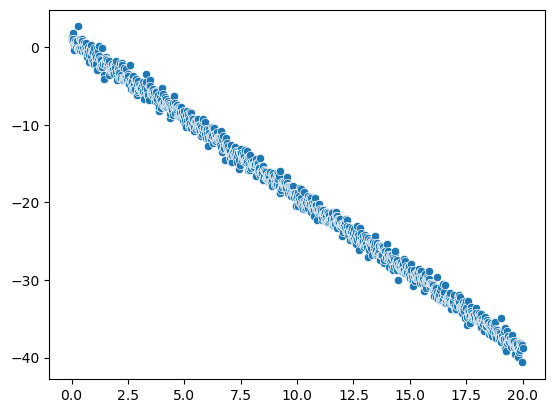

In [388]:
sns.scatterplot(x=x, y=y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [389]:
def y_pred_calculate(w1,w2,x):
    y_pred= np.zeros(len(x))
    for i in range(len(x)):
        y_pred[i]= w1 + w2 * x[i]
    return y_pred
    

In [390]:
def cost_function(y_pred, y):
    error=0
    for i in range(len(y)):
        error = error +((y_pred[i] - y[i]) ** 2)
    return (1 / (2 * len(y)))*error

In [391]:
def gradianta(w1, w2, x, y):
    y_pred = y_pred_calculate(w1, w2, x)
    for i in range(len(x)):
        w2=w2+((y_pred[i]-y[i] ) * x[i])
    return (1/len(x))*w2
    
def gradiantb(w1, w2, x, y):
    y_pred = y_pred_calculate(w1, w2, x)
    for i in range(len(x)):
        w1=w1+(y_pred[i]-y[i] )
    return (1/len(x))*w1

In [392]:
def updatea(w2, learn_rate, x, y, w1):
    return w2 - learn_rate * gradianta(w1, w2, x, y)

def updateb(w1, learn_rate, x, y, w2):
    return w1 - learn_rate * gradiantb(w1, w2, x, y)

In [393]:
def plot_cost(error_list):
    plt.figure(figsize=(8, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(error_list)))
    for i, (error, color) in enumerate(zip(error_list, colors)):
        plt.scatter(i, error, color=color)
    plt.xlabel("Iteration")
    plt.ylabel("Cost Function")
    plt.title("Gradient Descent Error Reduction")
    plt.colorbar(label="Iteration Progress")
    plt.show()

In [394]:
def plot_thetas(theta0,theta1):
    plt.figure(figsize=(8, 6))
    plt.plot( theta1, label="theta1", color="green")
    plt.plot( theta0, label="theta0", color="red")
    plt.xlabel("Iteration")
    plt.ylabel("theta")
    plt.title("theta vs. Iteration")
    plt.legend()
    plt.grid()
    plt.show()

In [395]:
def plot_losses(errorlist):
    plt.figure(figsize=(8, 6))
    plt.plot( errorlist, label="Loss", color="blue")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs. Iteration")
    plt.legend()
    plt.grid()
    plt.show()

In [396]:
def plot_theta0_loss(errorlist,theta0):
    plt.figure(figsize=(8, 6))
    plt.plot( errorlist, label="Loss", color="blue")
    plt.plot( theta0, label="theta0", color="red")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs. Iteration")
    plt.legend()
    plt.grid()
    plt.show()

In [397]:
def plot_theta1_loss(errorlist,theta1):
    plt.figure(figsize=(8, 6))
    plt.plot( errorlist, label="Loss", color="blue")
    plt.plot( theta1, label="theta1", color="cyan")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs. Iteration")
    plt.legend()
    plt.grid()
    plt.show()

In [398]:
def plot_all_theta(theta0,theta1):
    plt.figure(figsize=(8, 6))
    plt.plot( theta1, label="theta1", color="yellow")
    plt.plot( theta0, label="theta0", color="red")
    plt.xlabel("Iteration")
    plt.ylabel("theta")
    plt.title("theta vs. Iteration")
    plt.legend()
    plt.grid()
    plt.show()

In [399]:
def plot_the_best(final_w1,final_w2):
    plt.figure(figsize=(8, 6))
    y_line2 = final_w1 + final_w2 * x 
    plt.plot(x, y_line2, color="red", label="Regression Line")
    sns.scatterplot( x= x , y=y)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Data and Regression Line")
    plt.legend()
    plt.show()

In [400]:
def plot_loss_with_thetas(errorlist,theta0,theta1):
    plt.figure(figsize=(8, 6))
    plt.plot( errorlist, label="Loss", color="blue")
    plt.plot( theta0, label="theta0", color="red")
    plt.plot( theta1, label="theta1", color="green")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs. Iteration")
    plt.legend()
    plt.grid()
    plt.show()

In [401]:
def gradient_descent(x, y,max_iteration,learn_rate):

    w1=np.random.uniform(-0.1,0.1)
    w2=np.random.uniform(-0.1,0.1)
    iteration = 0
    error = 10
    errorlist =[]
    theta0 =[]
    theta1 =[]
    while max_iteration> iteration:
        y_predicted = y_pred_calculate(w1,w2,x) # calculate the y predicted

        error = cost_function(y_predicted,y) # then take the value of y predicted and calculate the error 
        errorlist.append(error)

        print(f"Iteration {iteration}, Error: {error}, w1: {w1}, w2: {w2}")

        w1=updateb(w1,learn_rate,x,y,w2) #update using the gradient
        theta0.append(w1)

        w2=updatea(w2,learn_rate,x,y,w1)
        theta1.append(w2)

        iteration+=1

    return w1,w2,y_predicted,errorlist,theta0,theta1

In [402]:
def plot_gradient_descent_3d(theta1_list, theta2_list, error_list):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot gradient descent path
    ax.scatter(theta1_list, theta2_list, error_list, color='red', marker='o', label='Gradient Descent Path')
    ax.plot(theta1_list, theta2_list, error_list, color='blue', linestyle='dashed')

    # Labels
    ax.set_xlabel('Theta1')
    ax.set_ylabel('Theta2')
    ax.set_zlabel('Cost Function J')
    ax.set_title('3D Gradient Descent Visualization')

    # Rotate for better view
    ax.view_init(elev=30, azim=135)

    plt.legend()
    plt.show()


In [403]:
max_iterations = 100
learn_rate = 0.001
final_w11, final_w21,predicted1,errorlist1,theta01,theta11 = gradient_descent(x, y, max_iterations,learn_rate)

print(f"Final weights: w1 = {final_w11}, w2 = {final_w21}")

Iteration 0, Error: 226.42190633837322, w1: 0.0419409250929384, w2: -0.08688411203023168
Iteration 1, Error: 169.87793262441292, w1: 0.023763262293192148, w2: -0.3323043798262231
Iteration 2, Error: 127.47752734398655, w1: 0.008057998011868354, w2: -0.5448282694574194
Iteration 3, Error: 95.68290167032178, w1: -0.005506306403597876, w2: -0.7288656024613278
Iteration 4, Error: 71.84118808340588, w1: -0.017216659620305132, w2: -0.8882350553915779
Iteration 5, Error: 53.96309150005823, w1: -0.027321596244139976, w2: -1.026243403929976
Iteration 6, Error: 40.55690726706362, w1: -0.036036334341030374, w2: -1.145754144174268
Iteration 7, Error: 30.504056887061974, w1: -0.043547241582642865, w2: -1.2492469151114571
Iteration 8, Error: 22.96575648397861, w1: -0.0500157026967346, w2: -1.3388689553952888
Iteration 9, Error: 17.313030653741578, w1: -0.05558146847841282, w2: -1.4164796622446167
Iteration 10, Error: 13.074232227411189, w1: -0.060365555860050296, w2: -1.4836891771364948
Iteration 11

In [404]:
y_=np.mean(y)
SStot=np.sum((y-y_)**2)
SSres=np.sum((predicted1 - y)**2)
R22= 1-(SSres/SStot)
print(R22)

0.9946005177981375


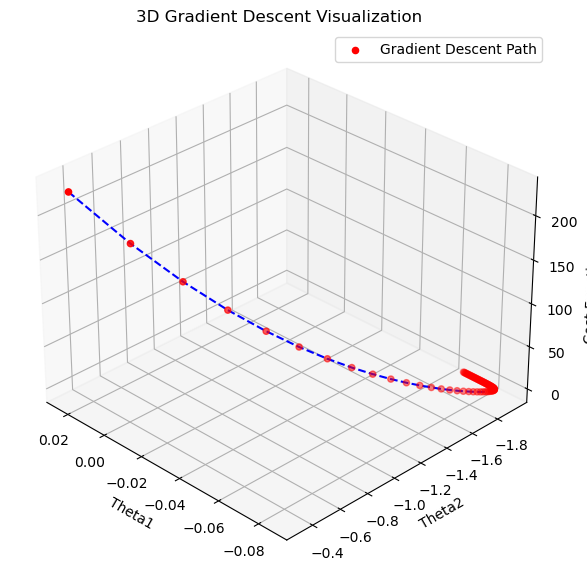

In [405]:
plot_gradient_descent_3d(theta01, theta11, errorlist1)

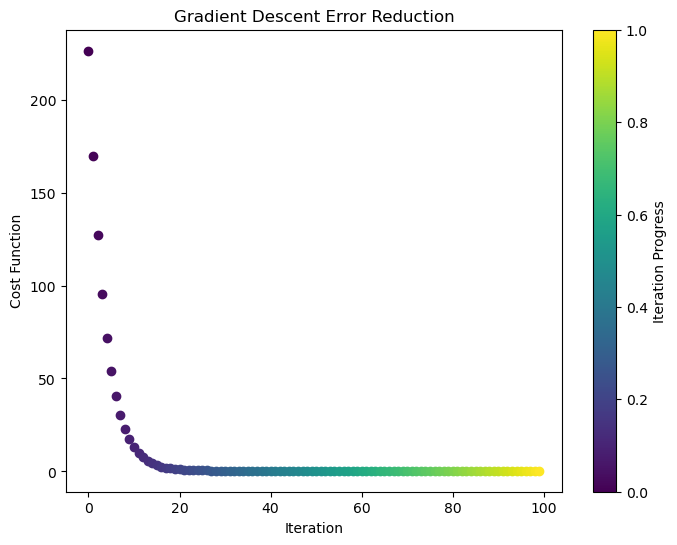

In [406]:
plot_cost(errorlist1)

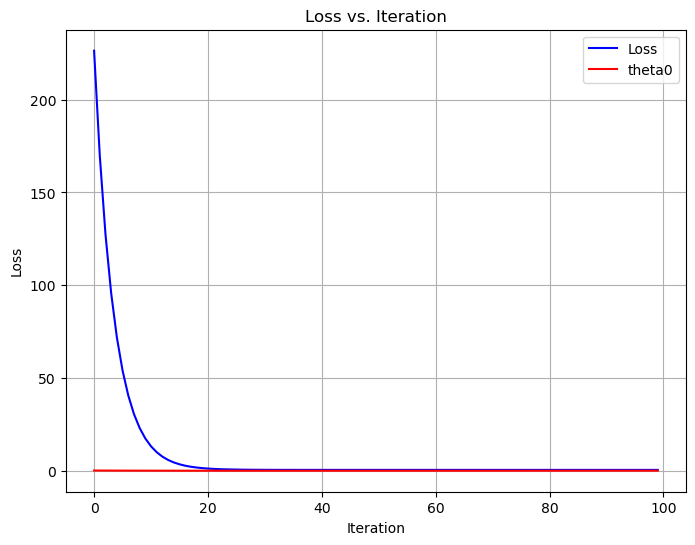

In [407]:
plot_theta0_loss(errorlist1,theta01)

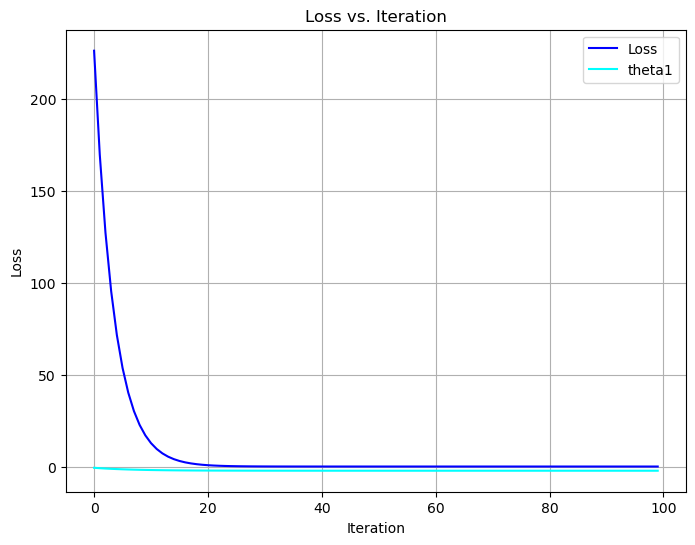

In [408]:
plot_theta1_loss(errorlist1,theta11)

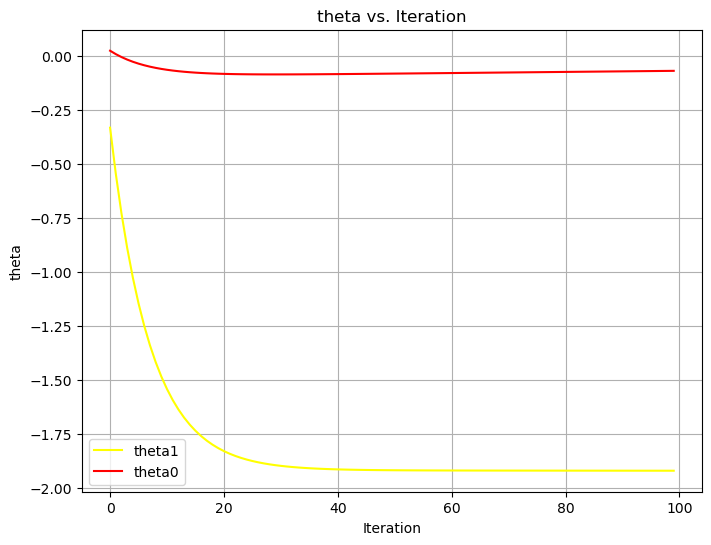

In [409]:
plot_all_theta(theta01,theta11)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


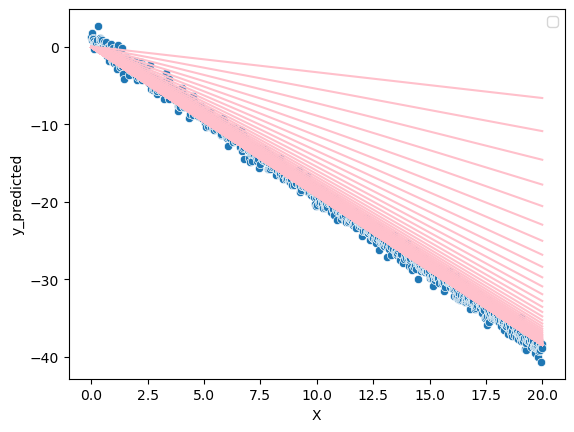

In [410]:
sns.scatterplot( x= x , y=y)
for i in range (100):
    y_new = theta01[i]+theta11[i]*x
    plt.plot(x, y_new, color="pink")

plt.xlabel("X")
plt.ylabel("y_predicted")
plt.legend()

plt.show()

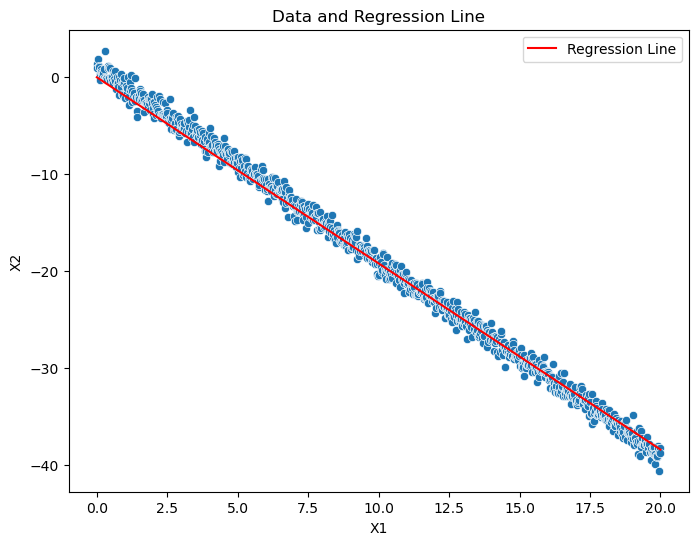

In [411]:
plot_the_best(final_w11,final_w21)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

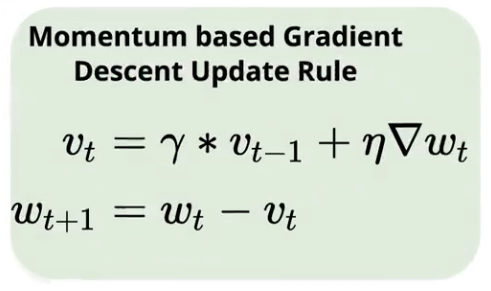

#### γ takes values between 0 and 1.
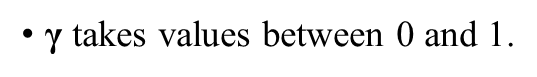

In [412]:
def y_pred_calculate2(w1, w2, x):
    return w1 + w2 * np.array(x)

def cost_function2(y_pred, y):
    return (1 / (2 * len(y))) * np.sum((y_pred - y) ** 2)

def gradianta2(w1, w2, x, y):
    y_pred = y_pred_calculate2(w1, w2, x)
    return -np.mean((y - y_pred) * x) # minus from the devriative 

def gradiantb2(w1, w2, x, y):
    y_pred = y_pred_calculate2(w1, w2, x)
    return -np.mean(y - y_pred)

def updatea2(w2, learn_rate, x, y, w1,gamma,pastgrad):
    momentum = gamma*pastgrad + (learn_rate * gradianta2(w1, w2, x, y))
    return w2 - momentum , momentum

def updateb2(w1, learn_rate, x, y, w2,gamma,pastgrad):
    momentum = gamma*pastgrad +(learn_rate * gradiantb2(w1, w2, x, y))
    return w1 - momentum , momentum

def gradient_descent2(x, y,max_iteration,learn_rate,tolerance,gamma):
    w1=np.random.uniform(-0.1,0.1)
    w2=np.random.uniform(-0.1,0.1)
    iteration = 0
    error = float('inf')

    pastgrada = 0  
    pastgradb = 0

    errorlist =[]
    theta0 =[]
    theta1 =[]


    while error > tolerance and max_iteration> iteration:
        y_predicted = y_pred_calculate2(w1,w2,x) # calculate the y predicted

        error = cost_function2(y_predicted,y) 
        errorlist.append(error) 

        print(f"Iteration {iteration}, Error: {error}, w1: {w1}, w2: {w2}")


        w1, pastgradb = updateb2(w1, learn_rate, x, y, w2, gamma, pastgradb)
        theta0.append(w1)
        w2, pastgrada = updatea2(w2, learn_rate, x, y, w1, gamma, pastgrada)
        theta1.append(w2)

        iteration+=1

    return w1,w2,y_predicted,theta0,theta1,errorlist



In [413]:
max_iterations = 100
tolerance = 1e-6
gamma = 0.6
learn_rate = 0.001
final_w12, final_w22,predicted2 , theta02,theta12 , errorlist2 = gradient_descent2(x, y, max_iterations,learn_rate, tolerance, gamma)

print(f"Final weights: w1 = {final_w12}, w2 = {final_w22}")

Iteration 0, Error: 244.0137293812914, w1: 0.03862010574942701, w2: -0.016352512146725354
Iteration 1, Error: 183.07000583373878, w1: 0.019740489711114292, w2: -0.2711415592322812
Iteration 2, Error: 109.57621890678894, w1: -0.007900125863292175, w2: -0.6445387525292741
Iteration 3, Error: 52.365104746529546, w1: -0.03703572861081056, w2: -1.0389982670217708
Iteration 4, Error: 18.876314941621388, w1: -0.06309459291452361, w2: -1.393213660031609
Iteration 5, Error: 4.294777352362709, w1: -0.08373920135755136, w2: -1.6758237770019118
Iteration 6, Error: 0.4745952501532197, w1: -0.09828851050602189, w2: -1.8776250267936363
Iteration 7, Error: 0.87746327690885, w1: -0.10714807827069235, w2: -2.0039320604114677
Iteration 8, Error: 1.9044032202701502, w1: -0.1113218713011398, w2: -2.068051459681142
Iteration 9, Error: 2.2969279898492796, w1: -0.11203883170532625, w2: -2.0862975765964005
Iteration 10, Error: 2.038162132737132, w1: -0.11049851440419932, w2: -2.074601094057899
Iteration 11, Er

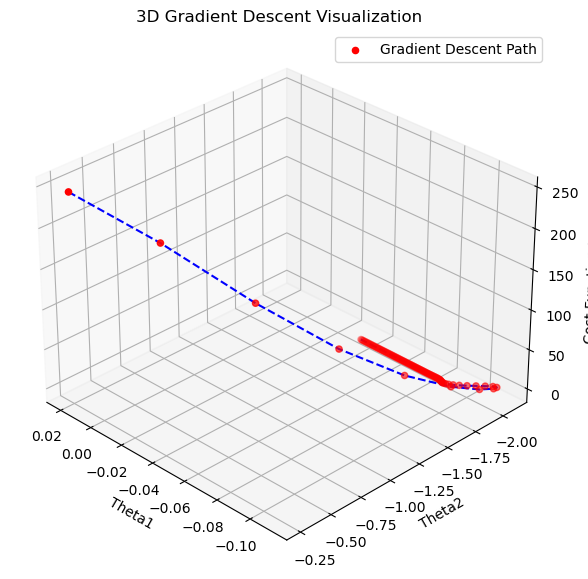

In [414]:
plot_gradient_descent_3d(theta02,theta12,errorlist2)

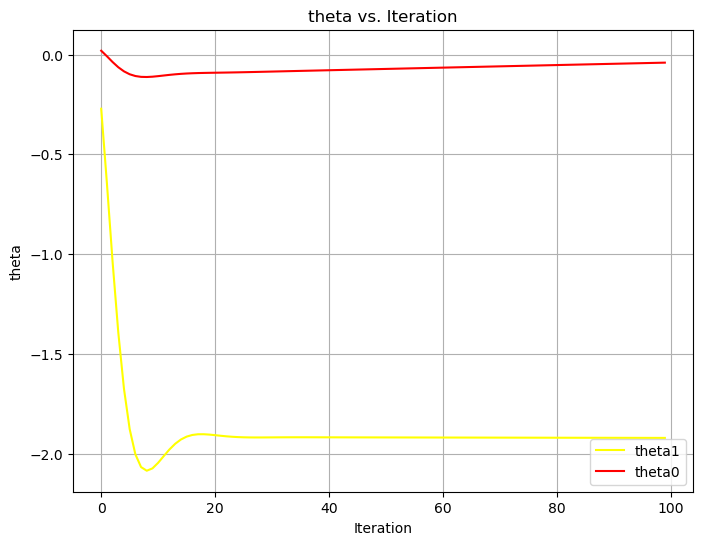

In [415]:
plot_all_theta(theta02,theta12)

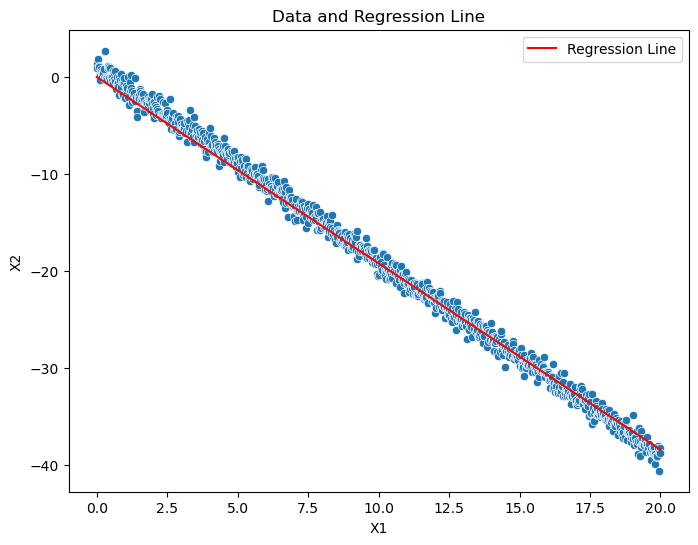

In [416]:
plot_the_best(final_w12,final_w22)

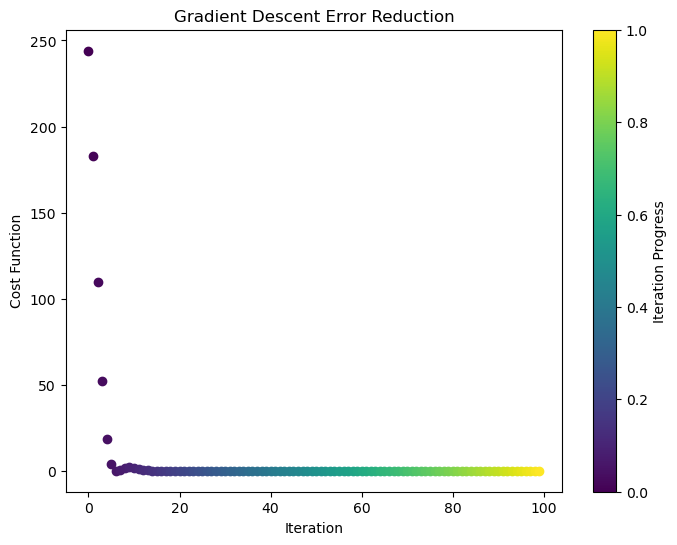

In [417]:
plot_cost(errorlist2)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [418]:
max_iterations = 100
tolerance = 1e-6
gamma = 0.9
learn_rate = 0.001
final_w12, final_w22,predicted2 , theta02,theta12 , errorlist2 = gradient_descent2(x, y, max_iterations,learn_rate, tolerance, gamma)

print(f"Final weights: w1 = {final_w12}, w2 = {final_w22}")

Iteration 0, Error: 248.44109266985186, w1: 0.03225801883968288, w2: 0.0014041524417008483
Iteration 1, Error: 186.3904510198858, w1: 0.013207198242395645, w2: -0.2556883019702265
Iteration 2, Error: 98.61416601200487, w1: -0.020399385527733533, w2: -0.7095317489399825
Iteration 3, Error: 27.735985206532156, w1: -0.06253411509995277, w2: -1.2794869958037802
Iteration 4, Error: 0.4743612219764775, w1: -0.10660248869584288, w2: -1.8774701108695746
Iteration 5, Error: 17.503323876175795, w1: -0.14638724238878292, w2: -2.420509472325013
Iteration 6, Error: 58.05160138645212, w1: -0.1768465598008206, w2: -2.841353375299992
Iteration 7, Error: 94.1621451748131, w1: -0.1946740862128843, w2: -3.0959024856372306
Iteration 8, Error: 105.7595743716955, w1: -0.19856968209518697, w2: -3.1667904583357642
Iteration 9, Error: 88.9688818818153, w1: -0.18921376517783708, w2: -3.0630205060400573
Iteration 10, Error: 54.888949729762885, w1: -0.16897854218067432, w2: -2.8161036920406746
Iteration 11, Error

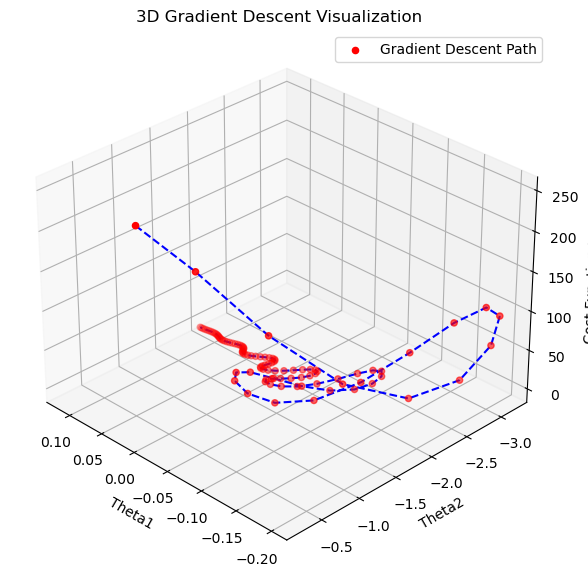

In [419]:
plot_gradient_descent_3d(theta02,theta12,errorlist2)

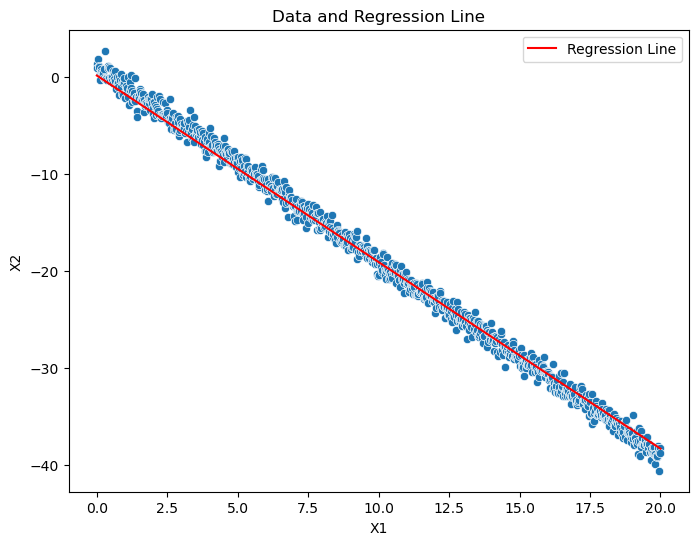

In [420]:
plot_the_best(final_w12,final_w22)

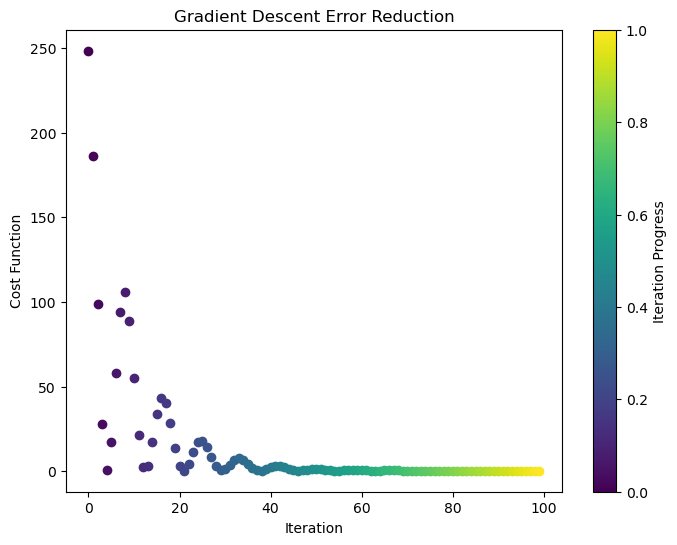

In [421]:
plot_cost(errorlist2)

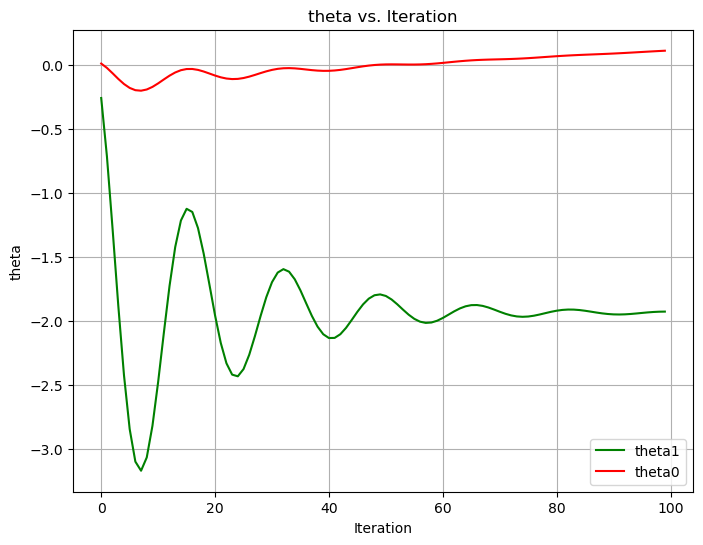

In [422]:
plot_thetas(theta02,theta12)

In [423]:
max_iterations = 100
tolerance = 1e-6
gamma = 0
learn_rate = 0.001
final_w12, final_w22,predicted2 , theta02,theta12 , errorlist2 = gradient_descent2(x, y, max_iterations,learn_rate, tolerance, gamma)

print(f"Final weights: w1 = {final_w12}, w2 = {final_w22}")

Iteration 0, Error: 270.7417942479691, w1: 0.009333572874638985, w2: 0.08791515559105131
Iteration 1, Error: 203.1149985266545, w1: -0.010559433308176706, w2: -0.18048020609866702
Iteration 2, Error: 152.4039076921032, w1: -0.0277485928679124, w2: -0.41289971703244455
Iteration 3, Error: 114.37734810242374, w1: -0.04259636815875058, w2: -0.6141659719446035
Iteration 4, Error: 85.86250032607708, w1: -0.055416633125176334, w2: -0.7884550923706348
Iteration 5, Error: 64.48017049707691, w1: -0.06648118662237534, w2: -0.9393833869659559
Iteration 6, Error: 48.44627884853832, w1: -0.07602539262012395, w2: -1.0700823949303253
Iteration 7, Error: 36.42300237435106, w1: -0.0842530643322311, w2: -1.1832638697931377
Iteration 8, Error: 27.40715152093616, w1: -0.09134069362399803, w2: -1.2812760520633486
Iteration 9, Error: 20.646467477543908, w1: -0.09744111346377109, w2: -1.3661523984796295
Iteration 10, Error: 15.576856222762828, w1: -0.10268666941954156, w2: -1.4396537790603336
Iteration 11, E

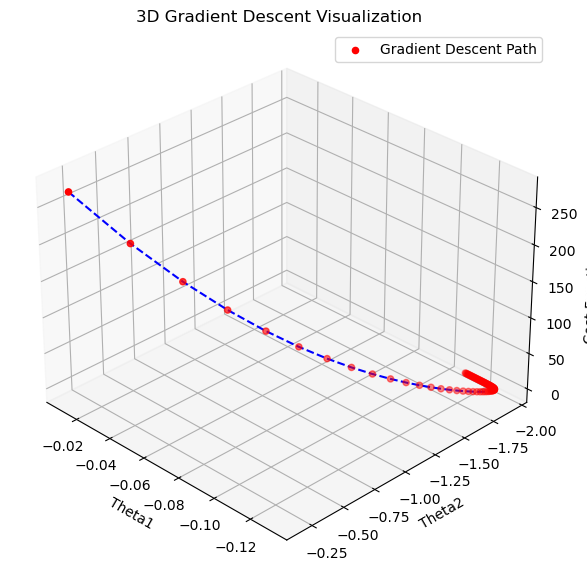

In [424]:
plot_gradient_descent_3d(theta02,theta12,errorlist2)

In [425]:
max_iterations = 100
tolerance = 1e-6
gamma = 0.3
learn_rate = 0.001
final_w12, final_w22,predicted2 , theta02,theta12 , errorlist2 = gradient_descent2(x, y, max_iterations,learn_rate, tolerance, gamma)

print(f"Final weights: w1 = {final_w12}, w2 = {final_w22}")

Iteration 0, Error: 251.10306453547852, w1: -0.029314691550736433, w2: 0.016280711963031977
Iteration 1, Error: 188.39089169322534, w1: -0.04845270503284656, w2: -0.2421796774490519
Iteration 2, Error: 126.65991229206219, w1: -0.07072838065198678, w2: -0.543476793733057
Iteration 3, Error: 81.18971161266106, w1: -0.09091010807377682, w2: -0.8172300553855533
Iteration 4, Error: 50.940948839233926, w1: -0.10770593669241507, w2: -1.0460334989894815
Iteration 5, Error: 31.677346178189428, w1: -0.12118116540544985, w2: -1.2306948502461132
Iteration 6, Error: 19.653721020163974, w1: -0.13180012540552424, w2: -1.3773735476178408
Iteration 7, Error: 12.220445957907422, w1: -0.14008479885799316, w2: -1.4930076540718158
Iteration 8, Error: 7.646189024820375, w1: -0.14650456060818823, w2: -1.5838385881153458
Iteration 9, Error: 4.837606310102055, w1: -0.15145011974551564, w2: -1.655062262181505
Iteration 10, Error: 3.1150222964079495, w1: -0.15523623579918383, w2: -1.7108646542204926
Iteration 11

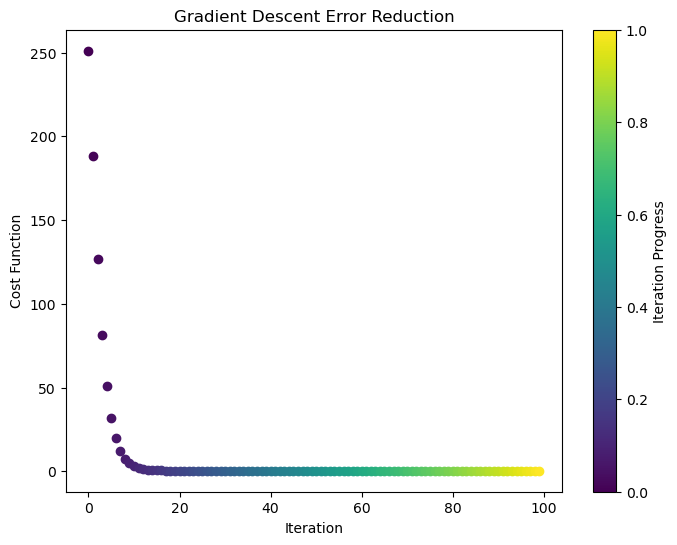

In [426]:
plot_cost(errorlist2)

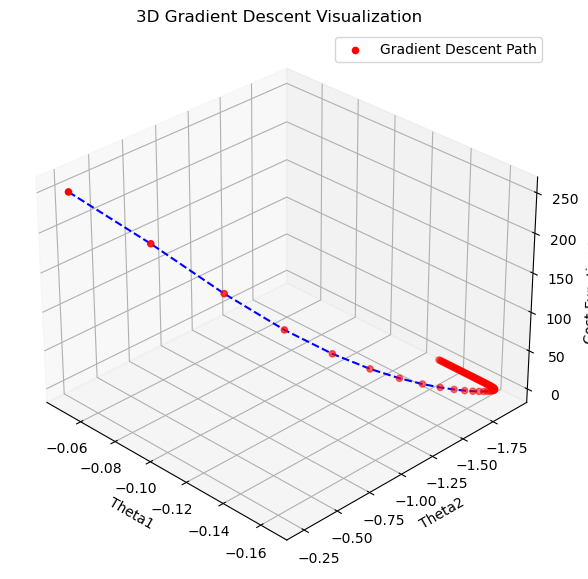

In [427]:
plot_gradient_descent_3d(theta02,theta12,errorlist2)

### Update your Batch GD for one variable  implementation to be AdaGrad and check your results

In [428]:
def y_pred_calculate2(w1, w2, x):
    return w1 + w2 * np.array(x)

def cost_function2(y_pred, y):
    return (1 / (2 * len(y))) * np.sum((y_pred - y) ** 2)

def gradianta2(w1, w2, x, y):
    y_pred = y_pred_calculate2(w1, w2, x)
    return -np.mean((y - y_pred) * x) # minus from the devriative 

def gradiantb2(w1, w2, x, y):
    y_pred = y_pred_calculate2(w1, w2, x)
    return -np.mean(y - y_pred)

def updatea2(w2, learn_rate, x, y, w1,gamma,pastgrad):
    thetatemp = w2 - gamma*pastgrad
    gradient = gradianta2( w1 ,thetatemp, x, y)
    momentum =  gamma*pastgrad + (learn_rate * gradient)
    thetanew = w2 - momentum
    return thetanew , momentum

def updateb2(w1, learn_rate, x, y, w2,gamma,pastgrad):
    thetatemp = w1 - gamma*pastgrad
    gradient = gradiantb2(w2,thetatemp,x,y)
    momentum = gamma*pastgrad + (learn_rate * gradient)
    thetanew = w1 - momentum
    return thetanew , momentum

def gradient_descent3(x, y,max_iteration,learn_rate,tolerance,gamma):
    w1=np.random.uniform(-0.1,0.1)
    w2=np.random.uniform(-0.1,0.1)
    iteration = 0
    error = float('inf')

    pastgrada = 0  
    pastgradb = 0

    errorlist =[]
    theta0 =[]
    theta1 =[]


    while error > tolerance and max_iteration> iteration:
        y_predicted = y_pred_calculate2(w1,w2,x) # calculate the y predicted

        error = cost_function2(y_predicted,y) 
        errorlist.append(error) 

        print(f"Iteration {iteration}, Error: {error}, w1: {w1}, w2: {w2}")


        w1, pastgradb = updateb2(w1, learn_rate, x, y, w2, gamma, pastgradb)
        theta0.append(w1)
        w2, pastgrada = updatea2(w2, learn_rate, x, y, w1, gamma, pastgrada)
        theta1.append(w2)

        iteration+=1

    return w1,w2,y_predicted,theta0,theta1,errorlist



In [429]:
max_iterations = 100
tolerance = 1e-6
gamma = 0.5
learn_rate = 0.001
final_w13, final_w23,predicted3 , theta03,theta13 , errorlist3 = gradient_descent3(x, y, max_iterations,learn_rate, tolerance, gamma)

print(f"Final weights: w1 = {final_w13}, w2 = {final_w23}")

Iteration 0, Error: 237.39182547033013, w1: 0.07478848782654296, w2: -0.04518014064163711
Iteration 1, Error: 178.0869318538698, w1: 0.055081262034888626, w2: -0.29647698788544385
Iteration 2, Error: 113.74483286104153, w1: 0.026067328581525752, w2: -0.622847595128295
Iteration 3, Error: 65.24795865146268, w1: -0.006936915222606373, w2: -0.9378797568497106
Iteration 4, Error: 34.558549317374364, w1: -0.04127128805060654, w2: -1.2056303153799304
Iteration 5, Error: 17.193588464524016, w1: -0.07565298045861117, w2: -1.4168319975251198
Iteration 6, Error: 8.155363168679724, w1: -0.10950307745249277, w2: -1.5750182339572114
Iteration 7, Error: 3.7679262315532442, w1: -0.14259334751001257, w2: -1.6887999223338466
Iteration 8, Error: 1.7709208956624145, w1: -0.17486281884508142, w2: -1.767839941983853
Iteration 9, Error: 0.9204140483092421, w1: -0.2063242600795364, w2: -1.8209678394255615
Iteration 10, Error: 0.5859147035571711, w1: -0.2370179841044012, w2: -1.8554738128746384
Iteration 11, 

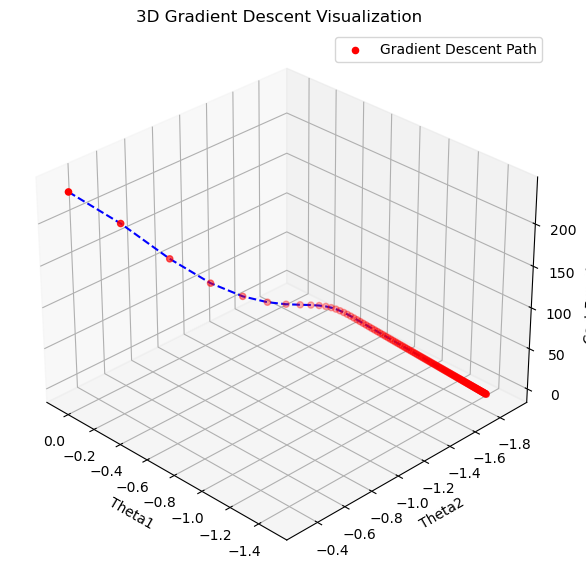

In [430]:
plot_gradient_descent_3d(theta03,theta13,errorlist3)

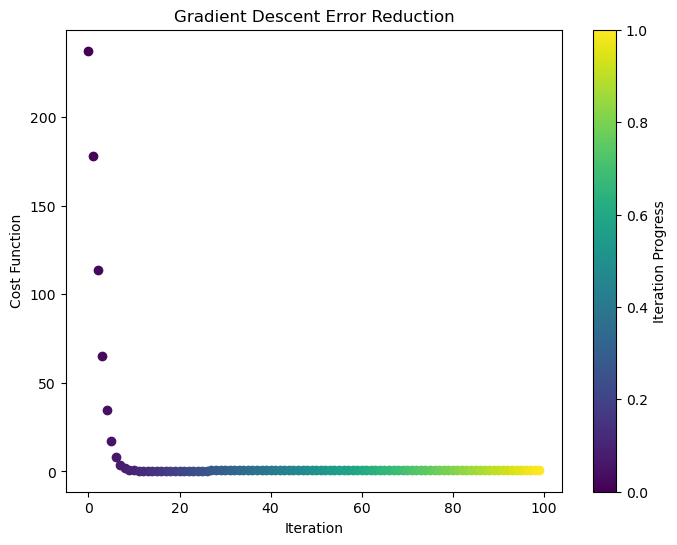

In [431]:
plot_cost(errorlist3)

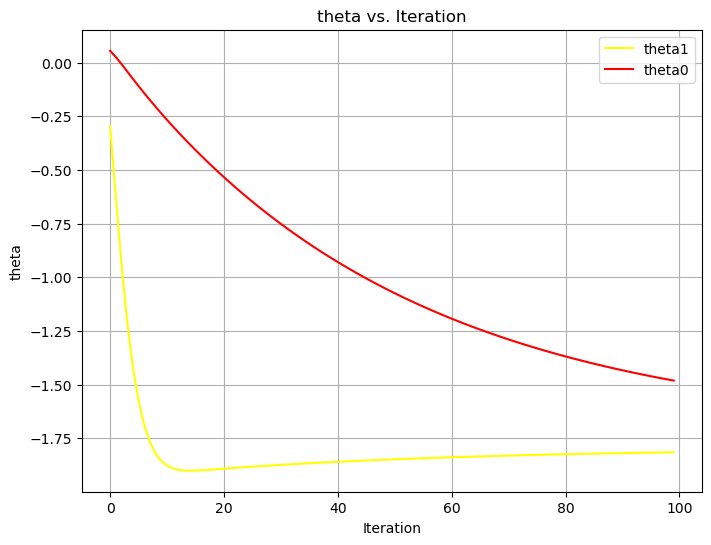

In [432]:
plot_all_theta(theta03,theta13)

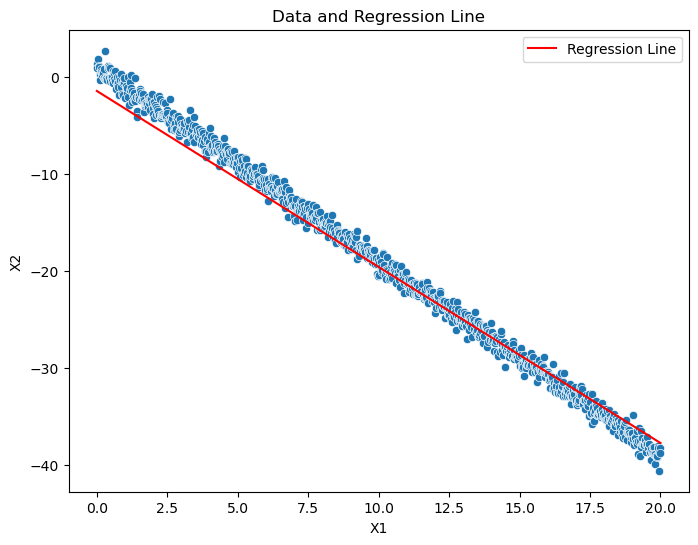

In [433]:
plot_the_best(final_w13,final_w23)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


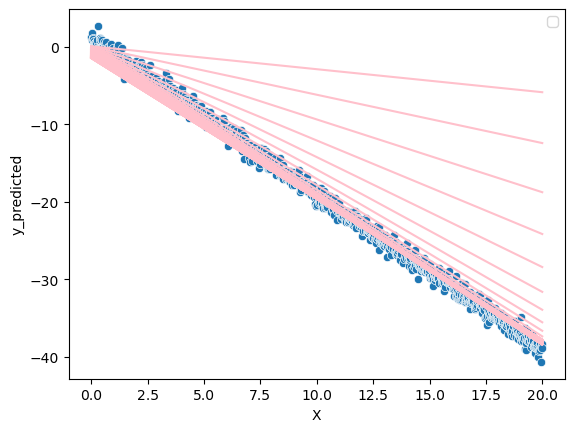

In [434]:
sns.scatterplot( x= x , y=y)
for i in range (100):
    y_new = theta03[i]+theta13[i]*x
    plt.plot(x, y_new, color="pink")

plt.xlabel("X")
plt.ylabel("y_predicted")
plt.legend()

plt.show()

### Update your Batch GD for one variable  implementation to be RMSProp and check your results

In [435]:
import math
def y_pred_calculate2(w1, w2, x):
    return w1 + w2 * np.array(x)

def cost_function2(y_pred, y):
    return (1 / (2 * len(y))) * np.sum((y_pred - y) ** 2)

def gradianta2(w1, w2, x, y):
    y_pred = y_pred_calculate2(w1, w2, x)
    return -np.mean((y - y_pred) * x) # minus from the devriative 

def gradiantb2(w1, w2, x, y):
    y_pred = y_pred_calculate2(w1, w2, x)
    return -np.mean(y - y_pred)

def updatea2(w2, learn_rate, x, y, w1,gamma,pastgrad,sumterm):
    momentum =  gamma*pastgrad + (1-gamma)*(gradianta2(w1, w2, x, y))**2
    thetanew = w2 - (learn_rate /( math.sqrt(momentum + sumterm)) * (gradianta2(w1, w2, x, y)))
    return thetanew , momentum

def updateb2(w1, learn_rate, x, y, w2,gamma,pastgrad,sumterm):
    momentum =  gamma*pastgrad + (1-gamma)*(gradiantb2(w1, w2, x, y))**2
    thetanew = w1 - (learn_rate /( math.sqrt(momentum + sumterm)) * (gradiantb2(w1, w2, x, y)))
    return thetanew , momentum

def gradient_descent4(x, y,max_iteration,learn_rate,tolerance,gamma,sumterm):
    w1=np.random.uniform(-0.1,0.1)
    w2=np.random.uniform(-0.1,0.1)
    iteration = 0
    error = float('inf')

    pastgrada = 0  
    pastgradb = 0

    errorlist =[]
    theta0 =[]
    theta1 =[]


    while error > tolerance and max_iteration> iteration:
        y_predicted = y_pred_calculate2(w1,w2,x) # calculate the y predicted

        error = cost_function2(y_predicted,y) 
        errorlist.append(error) 

        print(f"Iteration {iteration}, Error: {error}, w1: {w1}, w2: {w2}")


        w1, pastgradb = updateb2(w1, learn_rate, x, y, w2, gamma, pastgradb,sumterm)
        theta0.append(w1)
        w2, pastgrada = updatea2(w2, learn_rate, x, y, w1, gamma, pastgrada,sumterm)
        theta1.append(w2)

        iteration+=1

    return w1,w2,y_predicted,theta0,theta1,errorlist



In [436]:
max_iterations = 300
tolerance = 1e-6
gamma = 0.5
learn_rate = 0.01
sumterm = 1*10**-8
final_w14, final_w24,predicted4 , theta04,theta14 , errorlist4 = gradient_descent4(x, y, max_iterations,learn_rate, tolerance, gamma,sumterm)

print(f"Final weights: w1 = {final_w14}, w2 = {final_w24}")

Iteration 0, Error: 257.7320968779024, w1: 0.0824471591137303, w2: 0.03346591081922484
Iteration 1, Error: 253.76675873991923, w1: 0.06830502349037426, w2: 0.019323775195495954
Iteration 2, Error: 250.56022749288357, w1: 0.056789096355587765, w2: 0.007806411870905562
Iteration 3, Error: 247.61355101004364, w1: 0.046141362503468994, w2: -0.0028430804681430794
Iteration 4, Error: 244.7855040568188, w1: 0.03586244114081228, w2: -0.013123885442599398
Iteration 5, Error: 242.02060500742397, w1: 0.02575529431288108, w2: -0.02323298144195403
Iteration 6, Error: 239.2940831925103, w1: 0.015731524364098172, w2: -0.033258743263378465
Iteration 7, Error: 236.59421755953645, w1: 0.005749088588776876, w2: -0.043243203751642346
Iteration 8, Error: 233.9153048652822, w1: -0.004212577259925843, w2: -0.05320692270345764
Iteration 9, Error: 231.25453154637108, w1: -0.014163670752380389, w2: -0.06316009571345435
Iteration 10, Error: 228.61049995801685, w1: -0.024109282685059064, w2: -0.07310781279793913


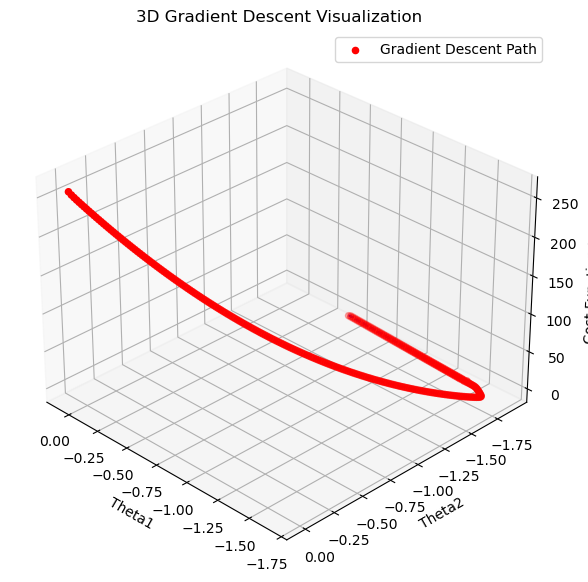

In [437]:
plot_gradient_descent_3d(theta04,theta14,errorlist4)

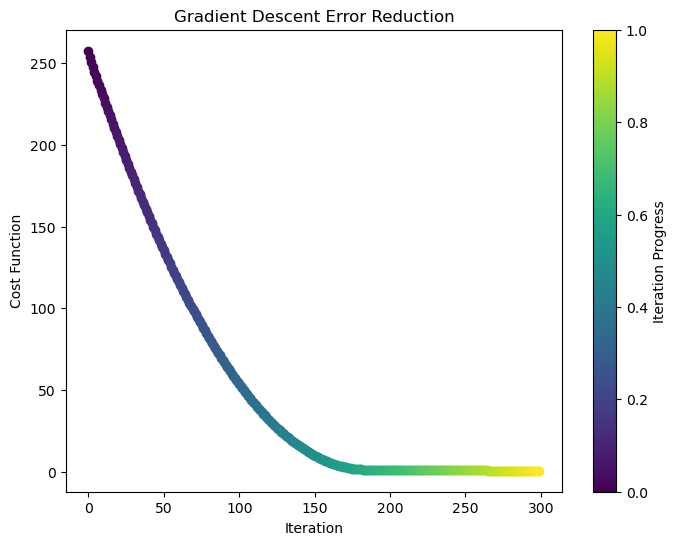

In [438]:
plot_cost(errorlist4)

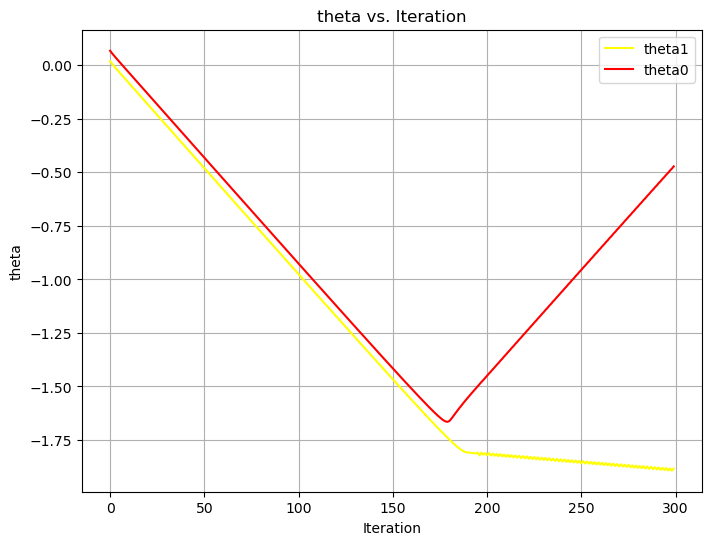

In [439]:
plot_all_theta(theta04,theta14)

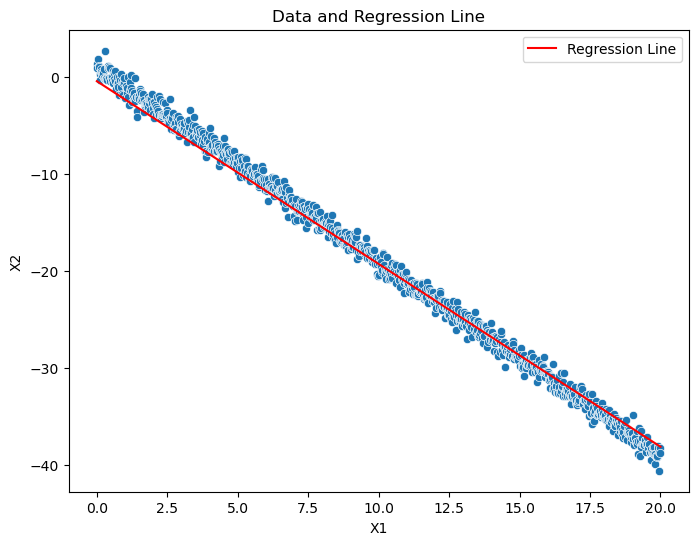

In [440]:
plot_the_best(final_w14,final_w24)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


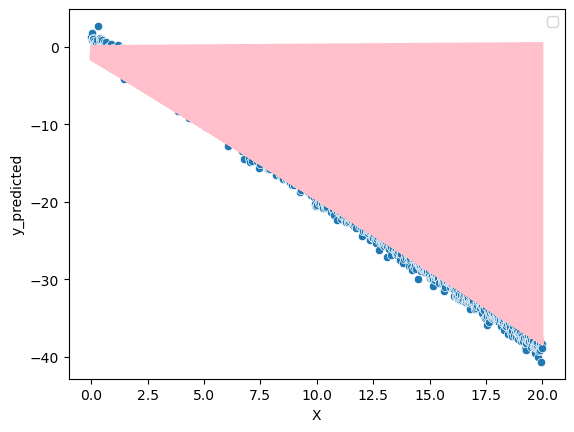

In [441]:
sns.scatterplot( x= x , y=y)
for i in range (300):
    y_new = theta04[i]+theta14[i]*x
    plt.plot(x, y_new, color="pink")

plt.xlabel("X")
plt.ylabel("y_predicted")
plt.legend()

plt.show()

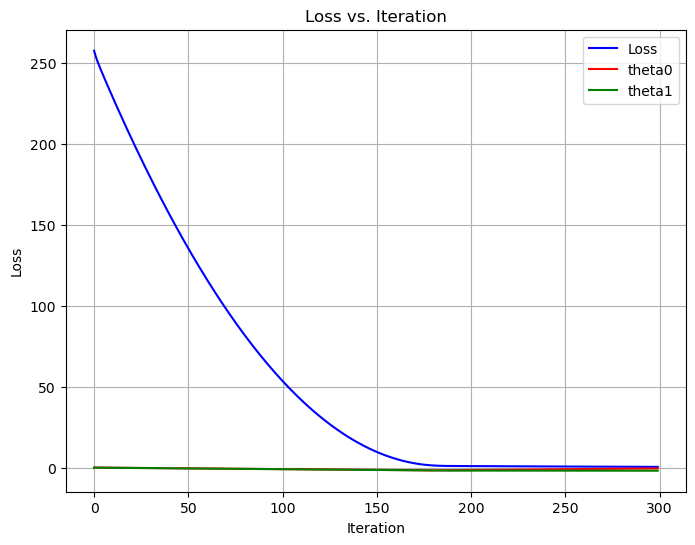

In [442]:
plot_loss_with_thetas(errorlist4,theta04,theta14)

### Update your Batch GD for one variable  implementation to be ADAM and check your results

In [443]:
import math
def y_pred_calculate2(w1, w2, x):
    return w1 + w2 * np.array(x)

def cost_function2(y_pred, y):
    return (1 / (2 * len(y))) * np.sum((y_pred - y) ** 2)

def gradianta2(w1, w2, x, y):
    y_pred = y_pred_calculate2(w1, w2, x)
    return -np.mean((y - y_pred) * x) # minus from the devriative 

def gradiantb2(w1, w2, x, y):
    y_pred = y_pred_calculate2(w1, w2, x)
    return -np.mean(y - y_pred)

def updatea2(w2, learn_rate, x, y, w1,gamma1, gamma2 ,pastgrad1,pastgrad2,sumterm):
    momentum1 =  gamma1*pastgrad1 + (1-gamma1)*(gradianta2(w1, w2, x, y))
    momentum2 =  gamma2*pastgrad2 + (1-gamma2)*(gradianta2(w1, w2, x, y))**2

    thetanew = w2 - (learn_rate /( math.sqrt(momentum2 + sumterm)) *momentum1)
    return thetanew , momentum1 , momentum2

def updateb2(w1, learn_rate, x, y, w2,gamma1, gamma2 ,pastgrad1,pastgrad2,sumterm):

    momentum1 =  gamma1*pastgrad1 + (1-gamma1)*(gradiantb2(w1, w2, x, y))
    momentum2 =  gamma2*pastgrad2 + (1-gamma2)*(gradiantb2(w1, w2, x, y))**2

    thetanew = w2 - (learn_rate /( math.sqrt(momentum2 + sumterm)) *momentum1)
    return thetanew , momentum1 , momentum2

def gradient_descent5(x, y,max_iteration,learn_rate,tolerance,gamma1,gamma2,sumterm):
    w1=np.random.uniform(-0.1,0.1)
    w2=np.random.uniform(-0.1,0.1)
    iteration = 0
    error = float('inf')

    pastgrada1 = 0  
    pastgrada2 =0
    pastgradb1 = 0
    pastgradb2 =0

    errorlist =[]
    theta0 =[]
    theta1 =[]


    while error > tolerance and max_iteration> iteration:
        y_predicted = y_pred_calculate2(w1,w2,x) # calculate the y predicted

        error = cost_function2(y_predicted,y) 
        errorlist.append(error) 

        print(f"Iteration {iteration}, Error: {error}, w1: {w1}, w2: {w2}")


        w1, pastgradb1 , pastgradb2 = updateb2(w1, learn_rate, x, y, w2, gamma1,gamma2, pastgradb1,pastgradb2,sumterm)
        theta0.append(w1)
        w2, pastgrada1,pastgrada2 = updatea2(w2, learn_rate, x, y, w1, gamma1 , gamma2, pastgrada1,pastgrada2,sumterm)
        theta1.append(w2)

        iteration+=1

    return w1,w2,y_predicted,theta0,theta1,errorlist



In [444]:
max_iterations = 300
tolerance = 1e-6
gamma1 = 0.9
gamma2 = 0.99
learn_rate = 0.01
sumterm = 1*10**-8
final_w15, final_w25,predicted5 , theta05,theta15 , errorlist5 = gradient_descent5(x, y, max_iterations,learn_rate, tolerance, gamma1,gamma2,sumterm)

print(f"Final weights: w1 = {final_w15}, w2 = {final_w25}")

Iteration 0, Error: 238.93851105055853, w1: -0.010562042653790987, w2: -0.032721820859871256
Iteration 1, Error: 235.82557236474898, w1: -0.042721820845521875, w2: -0.0427218208597925
Iteration 2, Error: 232.21456663597573, w1: -0.056188200831000984, w2: -0.056188632138020125
Iteration 3, Error: 228.03542274140986, w1: -0.07190553178003402, w2: -0.07190630148711051
Iteration 4, Error: 223.47752016253105, w1: -0.0892132679203751, w2: -0.0892144429057906
Iteration 5, Error: 218.66536863241515, w1: -0.10768003922072819, w2: -0.10768175714528193
Iteration 6, Error: 213.6875826664901, w1: -0.12699856260114575, w2: -0.12700100314030097
Iteration 7, Error: 208.60999799569325, w1: -0.14693879107445174, w2: -0.14694216040675065
Iteration 8, Error: 203.48277183324146, w1: -0.16732300702031, w2: -0.16732752754226987
Iteration 9, Error: 198.3446893720153, w1: -0.1880110088440129, w2: -0.1880169117293271
Iteration 10, Error: 193.22598829744774, w1: -0.20889058550140405, w2: -0.20889810511795362
Ite

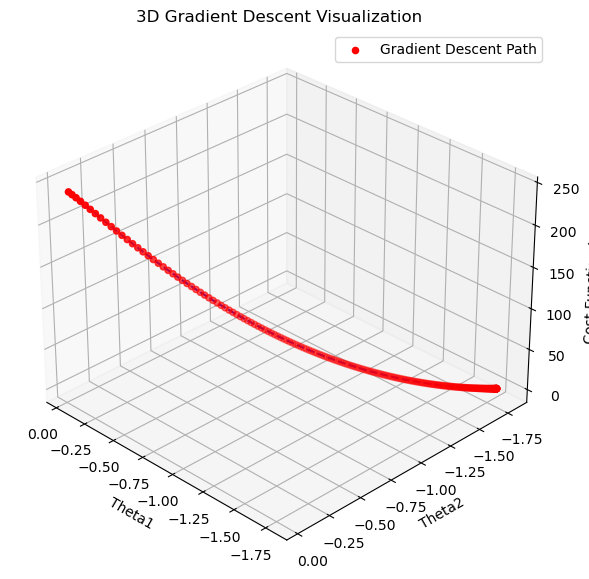

In [445]:
plot_gradient_descent_3d(theta05,theta15,errorlist5)

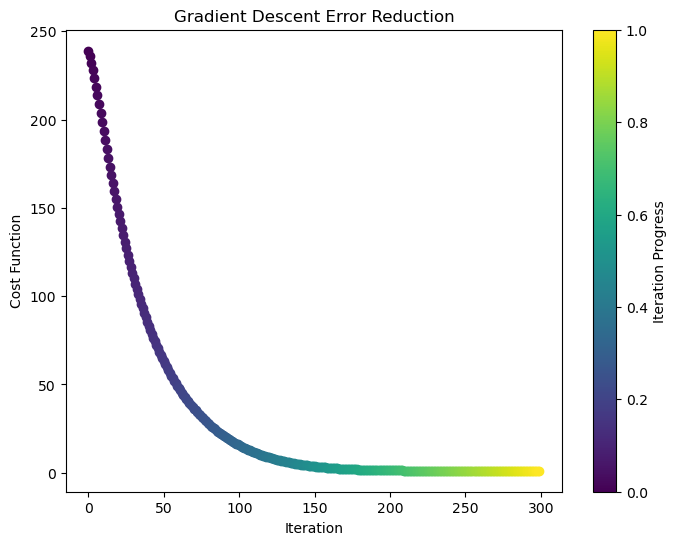

In [446]:
plot_cost(errorlist5)

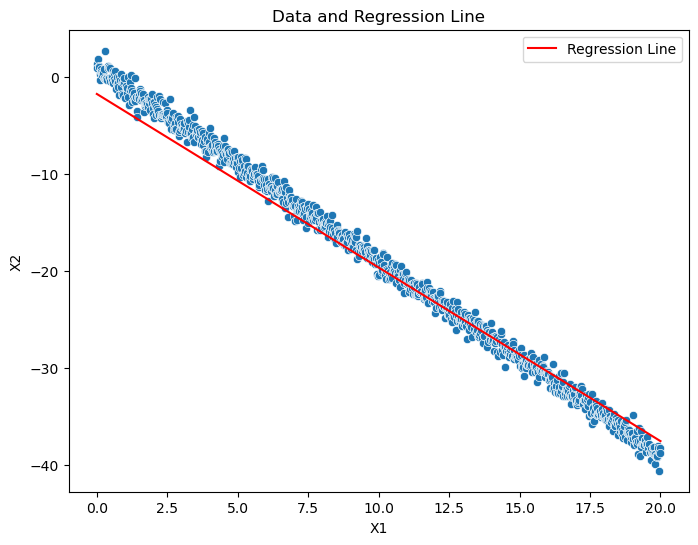

In [447]:
plot_the_best(final_w15,final_w25)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


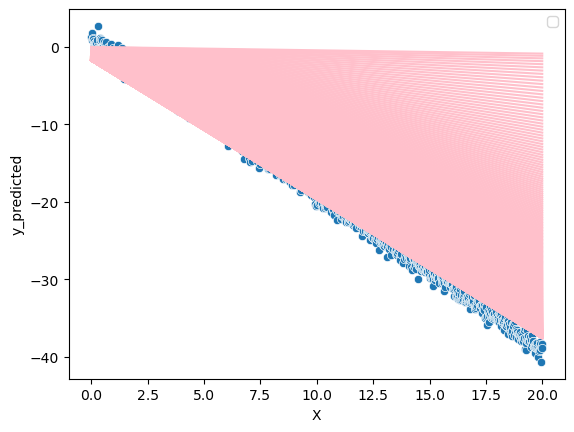

In [448]:
sns.scatterplot( x= x , y=y)
for i in range (300):
    y_new = theta05[i]+theta15[i]*x
    plt.plot(x, y_new, color="pink")

plt.xlabel("X")
plt.ylabel("y_predicted")
plt.legend()

plt.show()

## Congratulations 
